In [1]:
import numpy as np, pandas as pd
import os

In [2]:
import torch
import torchvision.models as models
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from tensorboardX import SummaryWriter

In [3]:
from helpers import Imagefolder_multilabel as myImagefolder

In [4]:
import Augmentor

In [13]:
image_resize = (112,112)
batch_size_train = 2
num_workers_train = 6
batch_size_valid = 2
num_workers_valid = 8

In [14]:
p1 = Augmentor.Pipeline()
p1.skew(probability=0.2)
p1.rotate_random_90(probability=0.2)
p1.rotate(probability=0.2, max_left_rotation=10, max_right_rotation=10)
p1.flip_random(probability=0.2)
img_transform1 = transforms.Compose([p1.torch_transform(), 
#                                     transforms.RandomGrayscale(p=0.3), 
#                                     transforms.RandomApply([transforms.ColorJitter(hue=0.1)], p=0.3), 
                                    transforms.Resize(image_resize), transforms.ToTensor()])

In [15]:
p2 = Augmentor.Pipeline()
p2.skew(probability=0.45)
p2.rotate_random_90(probability=0.45)
p2.rotate(probability=0.45, max_left_rotation=10, max_right_rotation=10)
p2.flip_random(probability=0.45)
img_transform2 = transforms.Compose([p2.torch_transform(), 
#                                     transforms.RandomGrayscale(p=0.3), 
#                                     transforms.RandomApply([transforms.ColorJitter(hue=0.1)], p=0.3), 
                                    transforms.Resize(image_resize), transforms.ToTensor()])

In [16]:
imgset_train = myImagefolder.DatasetFolder(root='../input/train_images/train_all/', label_file='../input/label_bbox_train.csv', desc_file='../input/label_bbox_desc.csv', transform=img_transform2)
sampler_train = torch.utils.data.sampler.WeightedRandomSampler(weights=imgset_train.weights, num_samples=int(imgset_train.num_samples), replacement=True)
loader_train = torch.utils.data.DataLoader(imgset_train, batch_size=batch_size_train, num_workers=num_workers_train, sampler=sampler_train)

In [17]:
img_transform_valid = transforms.Compose([transforms.Resize(image_resize),transforms.ToTensor()])

In [18]:
imgset_valid = myImagefolder.DatasetFolder(root='../input/train_images/train_all/', label_file='../input/label_bbox_valid.csv', desc_file='../input/label_bbox_desc.csv', transform=img_transform_valid)
loader_valid = torch.utils.data.DataLoader(imgset_valid, batch_size=batch_size_valid, num_workers=num_workers_valid, shuffle=True)

In [19]:
from matplotlib import pyplot as plt
from torchvision import utils
import numpy as np

0
tensor(1)
torch.Size([2, 553])
[['/m/0dzct'], ['/m/0cyhj_']]
[['Human face'], ['Orange']]


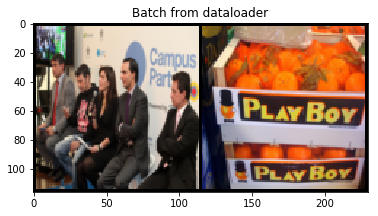

In [21]:
def show_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
#     batch_size = len(sample_batched)
#     im_size = images_batch.size(2)

#     sample_batched = list(map(lambda x: x.float(), sample_batched))
    grid = utils.make_grid(sample_batched)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

#     for i in range(batch_size):
#         plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
#                     landmarks_batch[i, :, 1].numpy(),
#                     s=10, marker='.', c='r')

    plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(loader_valid):
    print(i_batch)
    print(sample_batched[1].data[0].sum())
    print(sample_batched[1].size())
    print(list(map(lambda x: [imgset_train.idx_to_class[int(ii)] for i in np.where(x) for ii in i ], sample_batched[1]))) # for multilabel
    print(list(map(lambda x: [imgset_train.class_to_desc[imgset_train.idx_to_class[int(ii)]] for i in np.where(x) for ii in i ], sample_batched[1]))) # for multilabel
#     print(list(map(lambda x: [imgset_valid.idx_to_class[int(i)] for i in x ], [sample_batched[1]])))
#     print(list(map(lambda x: [imgset_valid.class_to_desc[imgset_valid.idx_to_class[int(i)]] for i in x ], [sample_batched[1]])))
    show_batch(sample_batched[0])
    break
    

    # observe 4th batch and stop.
#     if i_batch == 3:
#         plt.figure()
#         show_landmarks_batch(sample_batched)
#         plt.axis('off')
#         plt.ioff()
#         plt.show()
#         break